### Лабораторная работа №7

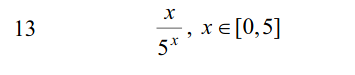

In [3]:
def f(x):
    return x/(5**x)

In [4]:
from sympy import diff, symbols, cos, sin
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import numpy
import pylab
import pandas as pd
import warnings
warnings.filterwarnings('ignore',category=RuntimeWarning)

При решении задач математического моделирования процессов и объектов часто очень практично использовать алгоритмы на языке Python с использованием символьных вычислений. Основываясь на библиотеке SymPy, Python с успехом справляется с решением уравнений и систем, интегрированием и дифференцированием, вычислением пределов, разложением в ряд и суммированием рядов, упрощением выражений, выполняет поиск решения дифференциальных уравнений и систем.

Соответственно, для вычисления производных в аналитическом виде, воспользуемся символьными вычислениями

In [5]:
x = symbols('x')
dx = diff(x/(5**x))
d2x = diff(dx)
print('Первая производная:',dx)
print('Вторая производная:',diff(dx))


Первая производная: -5**(-x)*x*log(5) + 5**(-x)
Вторая производная: 5**(-x)*x*log(5)**2 - 2*5**(-x)*log(5)


Построим графики 1 и 2 производных исходных функций

<IPython.core.display.Javascript object>


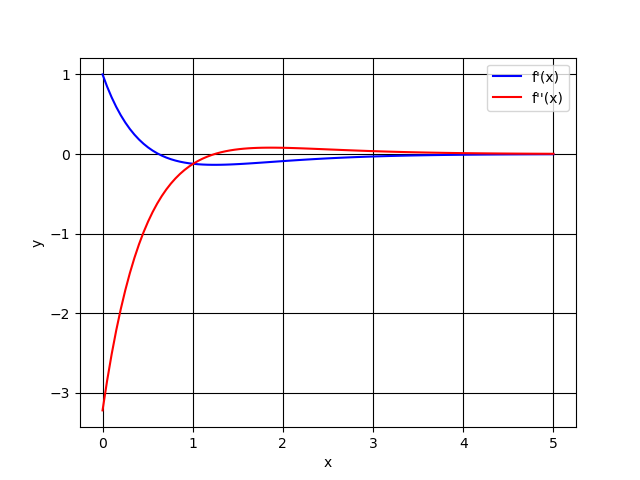

In [6]:
%matplotlib notebook 
x = np.linspace(0, 5, 100)                     # от -5 до 2 сделать 100 точек
fig, ax = plt.subplots()                        # будет 1 график, на нем:
ax.plot(x, -5**(-x)*x*log(5) + 5**(-x), color="blue", label="f'(x)")      # функция y1(x), синий, надпись y(x)
ax.plot(x, 5**(-x)*x*log(5)**2 - 2*5**(-x)*log(5), color="red", label="f''(x)")      # функция y2(x), красный, надпись y'(x)
ax.set_xlabel("x")                              # подпись у горизонтальной оси х
ax.set_ylabel("y")                              # подпись у вертикальной оси y
ax.legend()                                     # показывать условные обозначения
plt.grid(which = 'major',color = 'k')
plt.show()                                      # показать рисунок


Вычислим значение первой производной по определению, для этого создадим функцию, выполняющую эту операцию по формуле: $\frac{f(x+h)-f(x)}{h}$

In [46]:
# Вычисляем значения 1 производной по определеню
def derivative(f, x, h):
    return (f(x+h)-f(x))/h

X = np.arange(0,10,0.1)
p1 = []
p2 = []
p3 = []
for x in X:
    p1.append(derivative(f, x, 0.1))
    p2.append(derivative(f, x, 0.5))
    p3.append(derivative(f, x, 0.05))
# print(p1)


In [51]:
# Вычисляем значения производной по аналитической формуле
def func(x):
    return (-5**(-x)*x*np.log(5) + 5**(-x))
l1 = []
for i in np.arange(0,10,0.1):
    l1.append(func(i))
# print(l1)

Ошибка вычисляется по формуле: $\left | y'(x) - g(x,h) \right |$

In [52]:
# Считаем ошибку для вычиленной первой производной
%matplotlib notebook 
sub = []
sub1 = [abs(j-k) for k, j in zip(l1, p1)]
sub2 = [abs(j-k) for k, j in zip(l1, p2)]
sub3 = [abs(j-k) for k, j in zip(l1, p3)]
# print(sub)
sub.append(sub1)
sub.append(sub2)
sub.append(sub3)
# print(sub)

# print(sub1)
# print(sub2)
# print(sub3)
# plt.plot(p1,l1)

Построим график первой производной функции, на основе данных производной, вычисленной по-определению

<IPython.core.display.Javascript object>


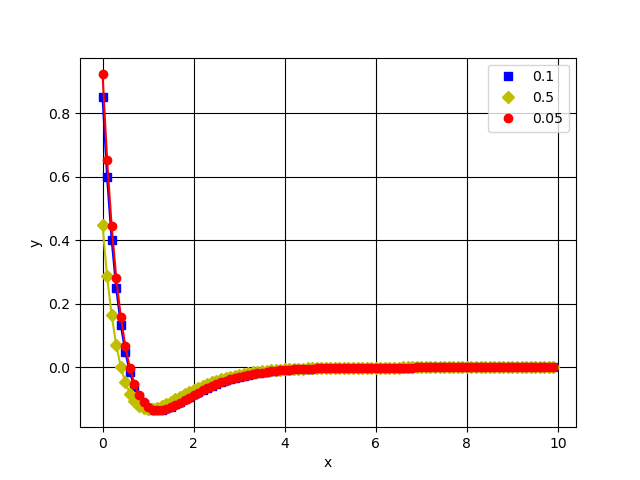

In [53]:
%matplotlib notebook 
x = np.arange(0,10,0.1)
fig, ax = plt.subplots()
ax.plot(x,p1,'b-')
ax.plot(x,p1,'bs',label = '0.1')
ax.plot(x,p2,'y-')
ax.plot(x,p2,'yD',label = '0.5')
ax.plot(x,p3,'r-')
ax.plot(x,p3,'ro',label = '0.05')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(which = 'major',color = 'k')
plt.show()



Построим график, учитывающий ошибку (вертикальная черта показывает реальную ошибку, основываясь на данных вычисленной ошибки). Так как ошибка мала, график нужно приближать. На первой точке ошибка еще довольно велика, и ее можно заметить без приближения)

<IPython.core.display.Javascript object>


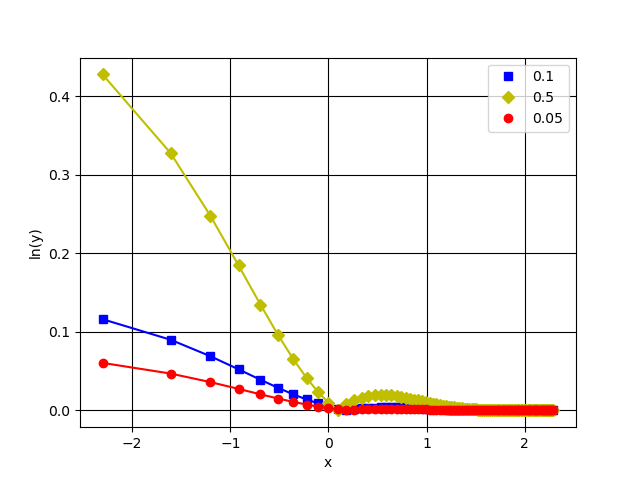

In [54]:
%matplotlib notebook 
h = np.arange(0,10,0.1)
fig, ax = plt.subplots()
ax.plot(np.log(h),sub1,'b-')
ax.plot(np.log(h),sub1,'bs',label = '0.1')
ax.plot(np.log(h),sub2,'y-')
ax.plot(np.log(h),sub2,'yD',label = '0.5')
ax.plot(np.log(h),sub3,'r-')
ax.plot(np.log(h),sub3,'ro',label = '0.05')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('ln(y)')
plt.grid(which = 'major',color = 'k')
plt.show()

Ошибка стремится к 0

Вычислим значение второй производной по определению, для этого создадим функцию, выполняющую эту операчию по формуле: $\frac{f(x-h)-2f(x)+f(x+h)}{h^{2}}$

In [55]:
# Вычисляем значения 2 производной по определеню
def derivative2(f, x,h):
    return (f(x-h)-2*f(x)+f(x+h))/(h**2)
p21 = []
p22 = []
p23 = []
X = np.arange(0,10,0.1)
for x in X:
    p21.append(derivative2(f, x,0.1))
    p22.append(derivative2(f, x,0.05))
    p23.append(derivative2(f, x,0.5))
# print(p2)

In [56]:
# Вычисляем значения производной по аналитической формуле
def func1(x):
    return 5**(-x)*x*np.log(5)**2 - 2*5**(-x)*np.log(5)
l2 = []
for i in np.arange(0,10,0.1):
    l2.append(func1(i))

# print(l2)

Ошибка вычисляется аналогично вычислению ошибки для 1 производной

In [57]:
# Считаем ошибку для вычиленной второй производной
%matplotlib notebook 
sub = []
sub4 = [abs(j-k) for k, j in zip(l2, p21)]
sub5 = [abs(j-k) for k, j in zip(l2, p22)]
sub6 = [abs(j-k) for k, j in zip(l2, p23)]
# print(sub)
sub.append(sub4)
sub.append(sub5)
sub.append(sub6)
# print(sub)

# print(sub4)
# print(sub5)
# print(sub6)

<IPython.core.display.Javascript object>


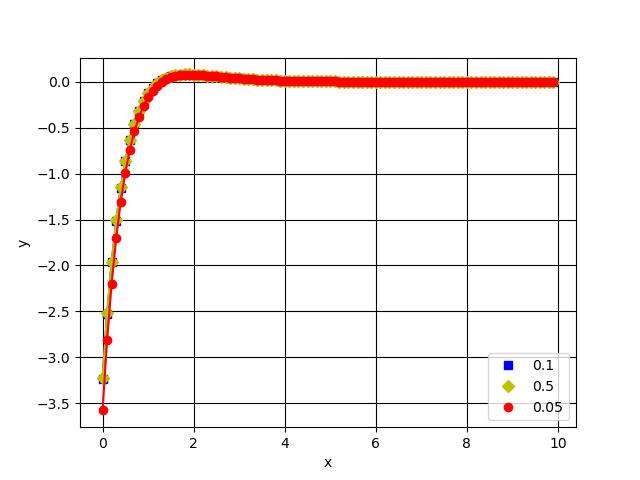

In [58]:
%matplotlib notebook 
x = np.arange(0,10,0.1)
fig, ax = plt.subplots()
plt.grid(which = 'major',color = 'k')
ax.plot(x,p21,'b-')
ax.plot(x,p21,'bs',label = '0.1')
ax.plot(x,p22,'y-')
ax.plot(x,p22,'yD',label = '0.5')
ax.plot(x,p23,'r-')
ax.plot(x,p23,'ro',label = '0.05')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


<IPython.core.display.Javascript object>


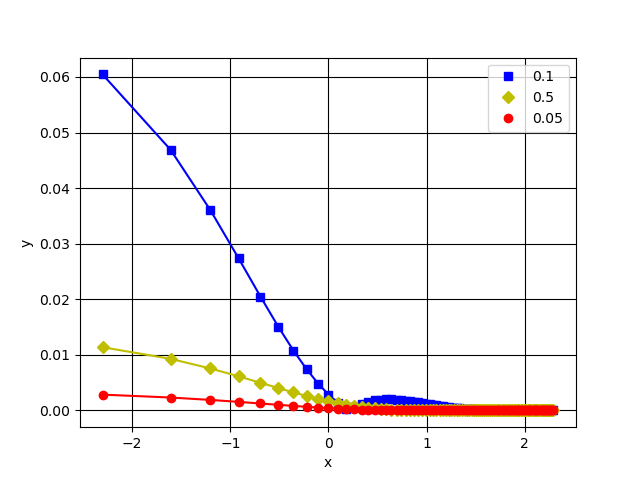

In [59]:
%matplotlib notebook 
h = np.arange(0,10,0.1)
fig, ax = plt.subplots()
ax.plot(np.log(h),sub3,'b-')
ax.plot(np.log(h),sub3,'bs',label = '0.1')
ax.plot(np.log(h),sub4,'y-')
ax.plot(np.log(h),sub4,'yD',label = '0.5')
ax.plot(np.log(h),sub5,'r-')
ax.plot(np.log(h),sub5,'ro',label = '0.05')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.grid(which = 'major',color = 'k')
plt.show()

### Прочитаем данные из исходного файла "diff-13"

In [131]:
fixed_df = pd.read_csv('diff-13.csv', 
                       encoding='latin1',
                       )
fixed_df[:10]

,X,Y
0,0.1,0.009048
1,0.2,0.032750
2,0.3,0.066670
3,0.4,0.107300
4,0.5,0.151600
5,0.6,0.197600
6,0.7,0.243300
7,0.8,0.287600
8,0.9,0.329300
9,1.0,0.367900


In [132]:
a = fixed_df['X'][:100]
b = fixed_df['Y'][:100]

### График, построенный по исходным данным

<IPython.core.display.Javascript object>


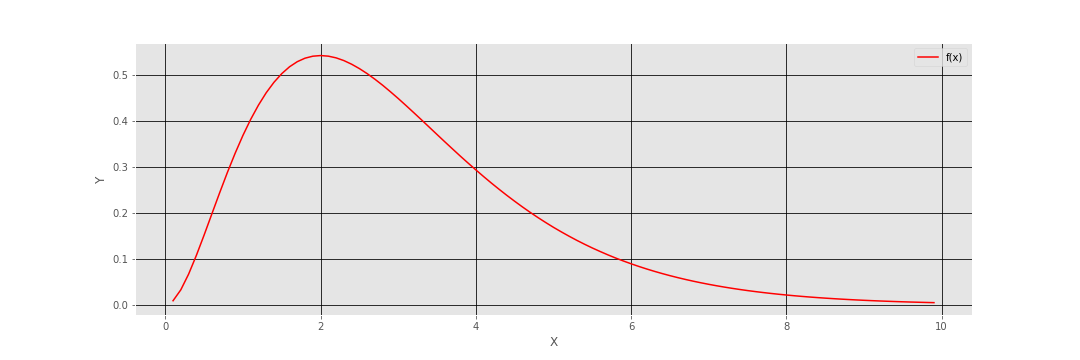

In [134]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(a,b,color = 'r',label = 'f(x)') 
plt.grid(which = 'major',color = 'k')
plt.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# В датасете 2 столбика, соответственно первый столбик - значения по Х, второй по Y

### Считаем первую производную и строим ее график

<IPython.core.display.Javascript object>


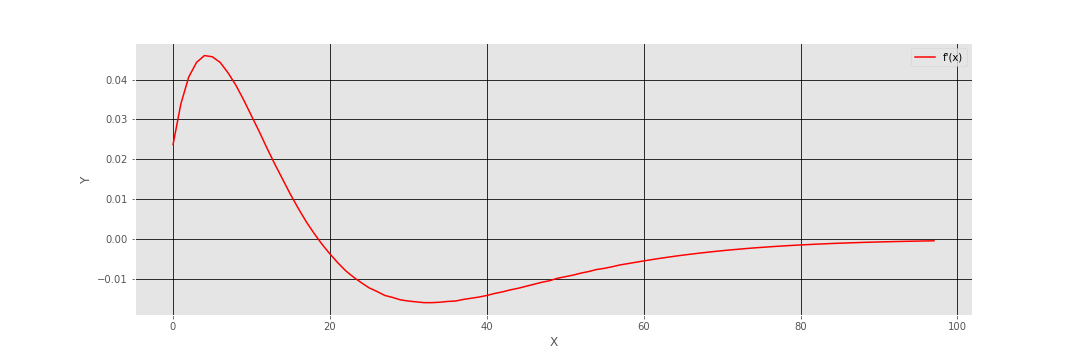

In [146]:
%matplotlib notebook 
dx = np.diff(b)
X = list(range(0,98))
fig, ax = plt.subplots()
ax.plot(X,dx,color = 'r',label = 'f\'(x)') 
plt.grid(which = 'major',color = 'k')
plt.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()
f = open('text.txt', 'w')
dx = str(dx)
f.write(dx)
f.write("\n")
f.close()


### Считаем вторую производную и строим ее график.

<IPython.core.display.Javascript object>


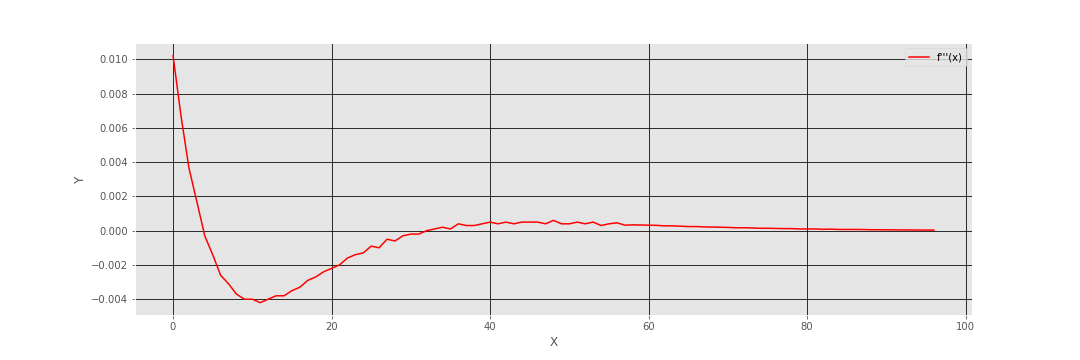

In [152]:
%matplotlib notebook 
d2x = np.diff(np.diff(b))
X = list(range(0,97))
fig, ax = plt.subplots()
ax.plot(X,d2x,color = 'r',label = 'f\'\'\'(x)') 
plt.grid(which = 'major',color = 'k')
plt.legend()
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()
f = open('text2.txt', 'w')
d2x = str(d2x)
f.write(d2x)
f.write("\n")
f.close()